# This script contains the following


1. Import libraries & Data 
2. Data Cleaning & Checks 
3. Data prep for regression analysis 
4. Regression Analysis 
5. Findings 

## 1. Import libraries & Data 

In [2]:
#Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:

%matplotlib inline

In [4]:
# Import data set

file_path = "/Users/biancaskyehoney/Documents/World Happiness Report /02 Data /Prepared Data/df_explored.csv"
df = pd.read_csv(file_path, index_col=0)

## 2. Data Cleaning 

In [5]:
df.columns

Index(['Country', 'Region', 'Rank', 'Score', 'GDP', 'Life Expectancy',
       'Freedom', 'Corruption', 'Generosity', 'year', 'GDP Level'],
      dtype='object')

In [6]:
df.head(10)

,Country,Region,Rank,Score,GDP,Life Expectancy,Freedom,Corruption,Generosity,year,GDP Level
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015,Mid-Range GDP
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015,Mid-Range GDP
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015,Mid-Range GDP
3,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015,Mid-Range GDP
4,Canada,North America,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015,Mid-Range GDP
5,Finland,Western Europe,6,7.406,1.29025,0.88911,0.64169,0.41372,0.23351,2015,Mid-Range GDP
6,Netherlands,Western Europe,7,7.378,1.32944,0.89284,0.61576,0.31814,0.47610,2015,Mid-Range GDP
7,Sweden,Western Europe,8,7.364,1.33171,0.91087,0.65980,0.43844,0.36262,2015,Mid-Range GDP
8,New Zealand,Australia and New Zealand,9,7.286,1.25018,0.90837,0.63938,0.42922,0.47501,2015,Mid-Range GDP
9,Australia,Australia and New Zealand,10,7.284,1.33358,0.93156,0.65124,0.35637,0.43562,2015,Mid-Range GDP


In [7]:
df.shape

(782, 11)

Not a large enough data set (min at least 5000)

#### Missing Values

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Country            0
Region             0
Rank               0
Score              0
GDP                0
Life Expectancy    0
Freedom            0
Corruption         0
Generosity         0
year               0
GDP Level          0
dtype: int64

#### Duplicates check

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(782,)

#### Extreme values check 

/var/folders/bv/g153b5q91hz3vzfclz_k_tv80000gn/T/ipykernel_16360/2688603195.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GDP'], bins=25) # Shows extreme values


<Axes: xlabel='GDP', ylabel='Density'>

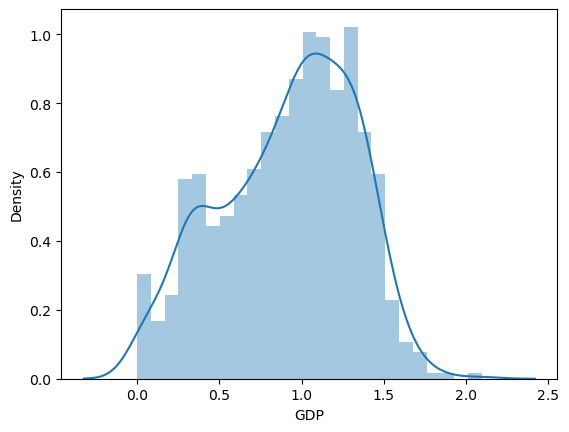

In [11]:
sns.distplot(df['GDP'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
df['GDP'].mean() # Check the mean

0.9160474824829717

In [13]:
df['GDP'].median() # Check the median

0.9822047088146211

In [14]:
df['GDP'].max() # Check the max

2.096

## 3. Data prep for regression analysis 

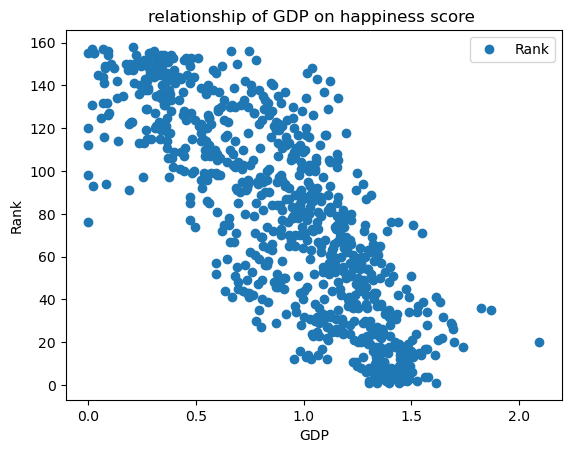

In [32]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'GDP', y='Rank',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('relationship of GDP on overall  ')  
plt.xlabel('GDP')  
plt.ylabel('Rank')  
plt.show()

#### Hypothesis: 

If the country has a higher GDP, then the country will score higher on a happiness scale

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['GDP'].values.reshape(-1,1)
y = df['Rank'].values.reshape(-1,1)

In [17]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [18]:
y

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis 

In [20]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

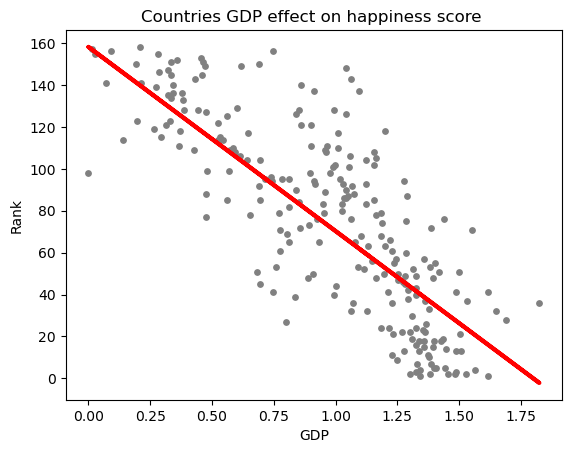

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Countries GDP effect on happiness score ')
plot_test.xlabel('GDP')
plot_test.ylabel('Rank')
plot_test.show()

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [25]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-87.89426997]]
Mean squared error:  751.0905249693953
R2 score:  0.6300997799178838


#### Initial findings (test set):

- Positive slope value (as GDP increases, so does score)
- Mean squared: quite small indiicating a fairly accurate representation of data
- R2 Score indicates a relatively good fit - but not excellent

Let's keep exploring

In [26]:
y_predicted

array([[ 61.33767069],
       [ 35.30365726],
       [ 23.6468067 ],
       [ 35.61040826],
       [133.11240089],
       [ 56.4973295 ],
       [124.34055274],
       [ 93.10556602],
       [ 32.89623321],
       [ 53.8941743 ],
       [ 64.86601602],
       [ 55.79005371],
       [126.62580376],
       [ 77.84448393],
       [156.83506435],
       [ 38.68934454],
       [116.3263098 ],
       [ 79.02255387],
       [ 59.6556437 ],
       [ 82.79300029],
       [ -2.1630332 ],
       [151.76356497],
       [107.72853572],
       [ 38.46785098],
       [  9.60161484],
       [ 37.58890828],
       [ 50.15778889],
       [ 36.62207131],
       [120.28990947],
       [ 38.9952166 ],
       [ 13.2421955 ],
       [ 31.78788646],
       [ 57.34490334],
       [141.39204112],
       [ 37.2373312 ],
       [ 69.40663401],
       [155.89459566],
       [ 66.46657068],
       [ 44.68940998],
       [ 51.6669335 ],
       [129.15364297],
       [ 35.56148465],
       [ 92.69861555],
       [ 64

In [27]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,68,61.337671
1,18,35.303657
2,37,23.646807
3,15,35.610408
4,146,133.112401
5,108,56.497329
6,128,124.340553
7,96,93.105566
8,18,32.896233
9,74,53.894174


Relatively close - but a few values have a bigger difference 

#### Compare how the regression fits the training test set

In [28]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-87.89426997]]
Mean squared error:  752.3904914792612
R2 score:  0.6310895135863903


#### initial findings: 

- Slope remains relatively unchanged
- Mean squared is  lower indicating a less accuratre representation of data
- R2 is only slightly higher than in training set - so have not overfit model

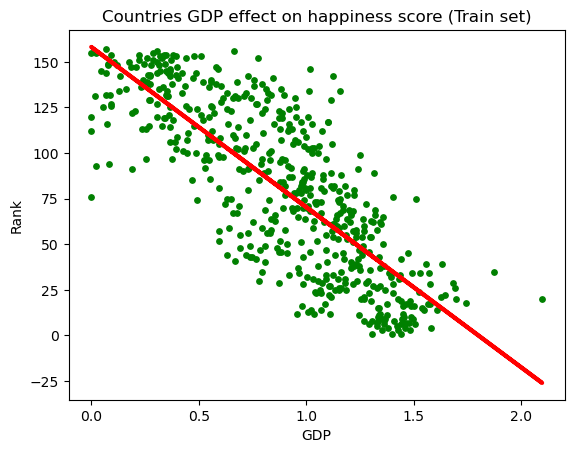

In [31]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Countries GDP effect on happiness score (Train set)')
plot_test.xlabel('GDP')
plot_test.ylabel('Rank')
plot_test.show()

### 5. Findings: 

- Based on our findings above, one can see that there is a relationship between GDP and happiness score, however it indicates that there is potential for more accuracy and insight, perhaps in the inclusion of multiple variables. This we already know based on the nature of the data set - I think multiple regressions would need to be performs 
- Data set was not greater that 5000 observations (this is potentially a problem) 